## Import Liberaies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Load Data

In [11]:
from sklearn.datasets import fetch_california_housing

In [14]:
datas = fetch_california_housing()


In [15]:
datas

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
df = pd.DataFrame(datas.data,columns=datas.feature_names)

In [24]:
df['target'] = datas.target

In [25]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Clean Data (missing values, outliers)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [53]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [27]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

<Axes: xlabel='MedInc'>

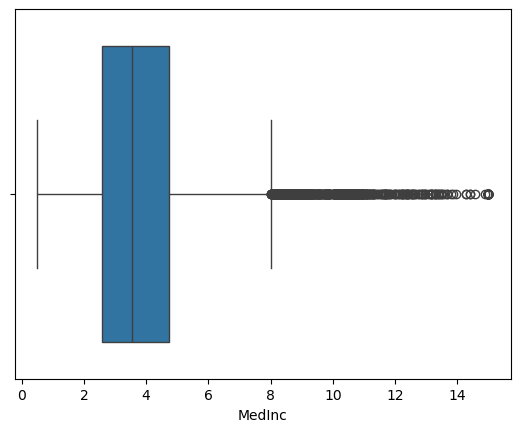

In [28]:
sns.boxplot(x=df['MedInc'])

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

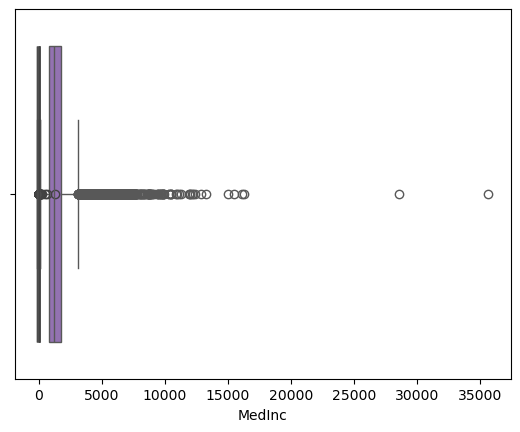

In [40]:
feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude', 'target']

for cc in feature_columns:
    sns.boxplot(x = df[cc])

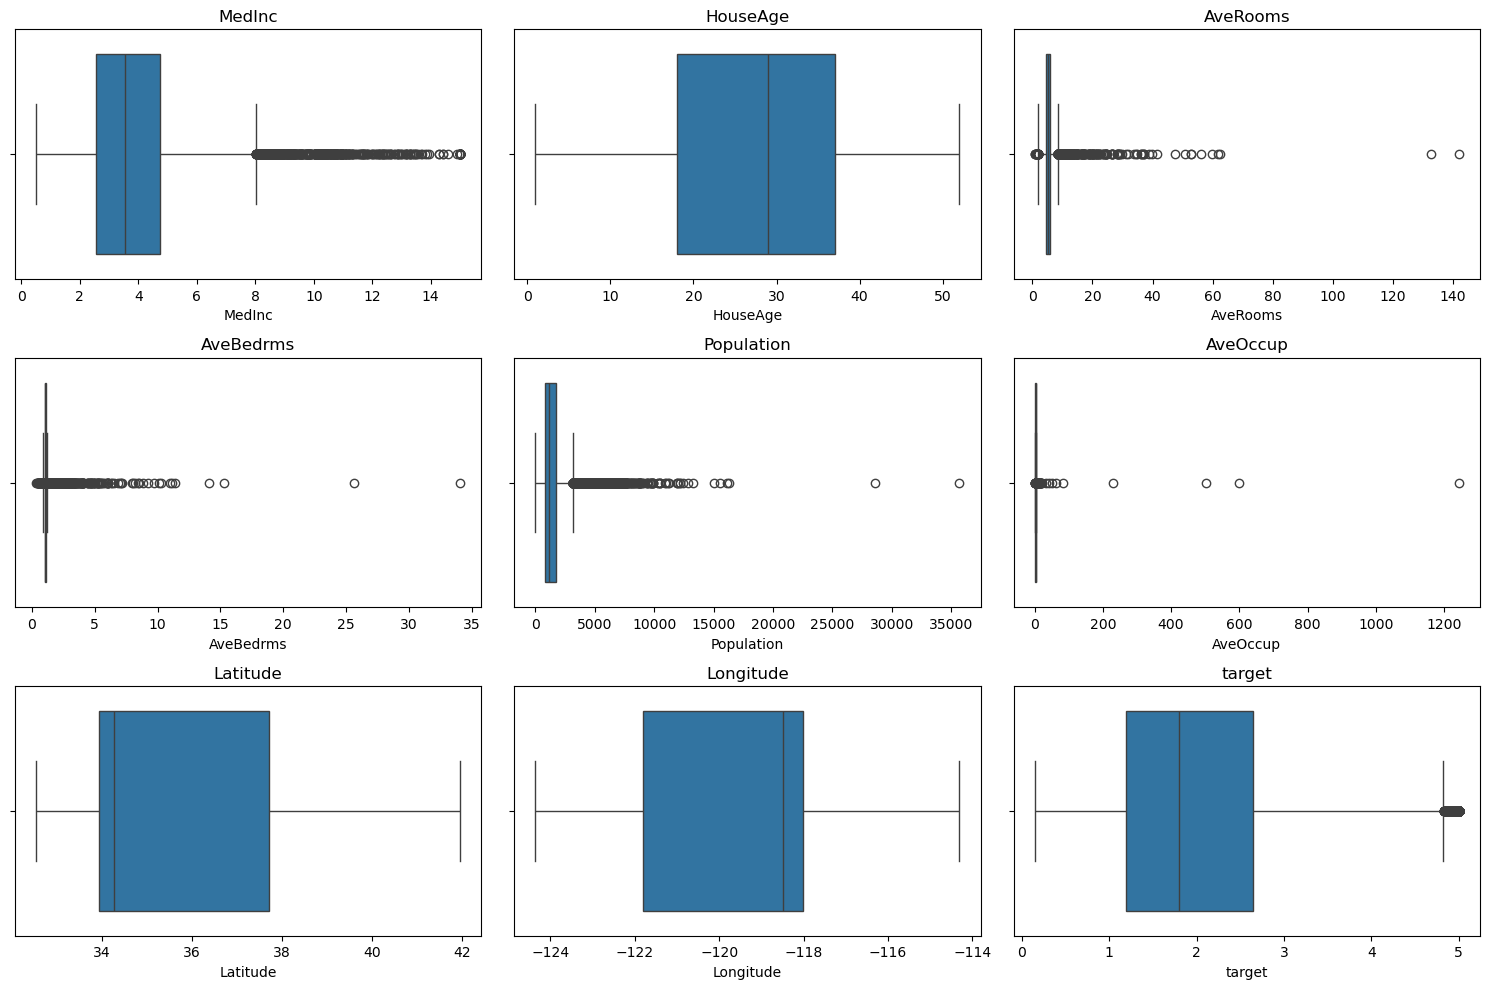

In [46]:
feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude', 'target']

plt.figure(figsize=(15, 10))  # Bigger figure
for i, cc in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[cc])
    plt.title(cc)
plt.tight_layout()
plt.show()

### Segregete X and y

In [49]:
X = df.drop('target',axis=1)
y = df.target

## Split Data (train/test)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
print("X_train Shape:",X_train.shape)
print("y_train Shape:",y_train.shape)

print("-"*30)

print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (16512, 8)
y_train Shape: (16512,)
------------------------------
X_test Shape: (4128, 8)
y_test Shape: (4128,)


## Preprocess Features (scaling, encoding, etc.)

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Model (Linear, Logistic, Tree, etc.)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr = LinearRegression()
lr

LinearRegression()

In [93]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [94]:
y_pred_lr = model.predict(X_test_scaled)

In [95]:
pd.DataFrame(y_pred_lr,columns=['Predicted'])

,Predicted
0,0.719123
1,1.764017
2,2.709659
3,2.838926
4,2.604657
...,...
4123,1.991746
4124,2.249839
4125,4.468770
4126,1.187511


In [96]:
pd.DataFrame(y_test)

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [88]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf

RandomForestRegressor(random_state=42)

In [101]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred_rf = rf.predict(X_test)

In [104]:
pd.DataFrame(y_pred_rf,columns=['Predicted'])

,Predicted
0,0.509500
1,0.741610
2,4.923257
3,2.529610
4,2.273690
...,...
4123,2.267210
4124,1.993650
4125,4.758219
4126,0.714090


In [106]:
pd.DataFrame(y_test)

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


## Evaluate the model

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [121]:
print("Linear Regression")
print('-'*30)
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error : ",root_mean_squared_error(y_test,y_pred_lr))
print("R Squared : ",r2_score(y_test,y_pred_lr))

Linear Regression
------------------------------
Mean Squared Error :  0.5558915986952441
Mean Absolute Error :  0.5332001304956566
Root Mean Squared Error :  0.7455813830127762
R Squared :  0.575787706032451


### RandomForest metrics

In [123]:
print("Random Forest")
print('-'*30)
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred_rf))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_rf))
print("Root Mean Squared Error : ",root_mean_squared_error(y_test,y_pred_rf))
print("R Squared : ",r2_score(y_test,y_pred_rf))

Random Forest
------------------------------
Mean Squared Error :  0.2553684927247781
Mean Absolute Error :  0.32754256845930246
Root Mean Squared Error :  0.5053399773665033
R Squared :  0.8051230593157366


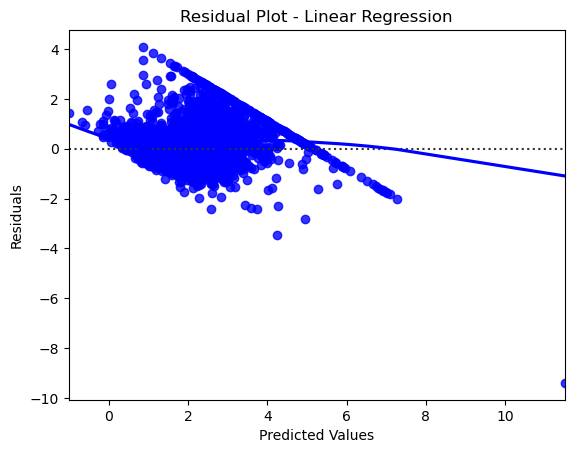

In [108]:
# 1. Residual Plot for Linear Regression
sns.residplot(x=y_pred_lr, y=y_test - y_pred_lr, lowess=True, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Linear Regression')
plt.show()

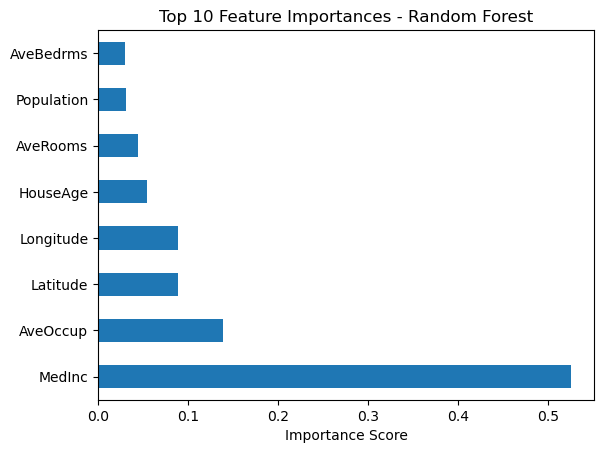

In [111]:
# 2. Feature Importance for Random Forest

feature_importance = pd.Series(rf.feature_importances_, index=data.feature_names)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.show()